## 1 Predict salart hike using Simple linear regression - Salary  dataset

* Salary_hike -> Build a prediction model for Salary_hike

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('Salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### EDA

In [3]:
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [5]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

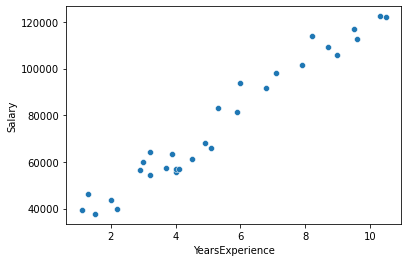

In [6]:
sns.scatterplot(x='YearsExperience',y='Salary',data=df)

<AxesSubplot:ylabel='Salary'>

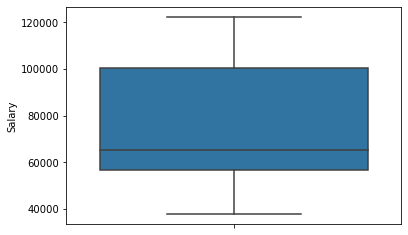

In [7]:
sns.boxplot(y=df['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

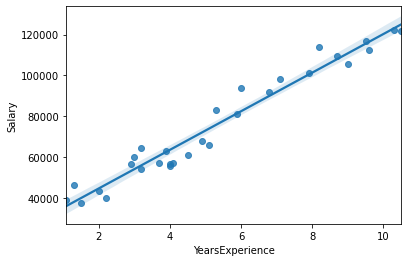

In [8]:
sns.regplot(x='YearsExperience',y='Salary',data=df)

### Models with diffrent Transformations

In [9]:
# no transformations

model1 = smf.ols('Salary~YearsExperience',data=df).fit()
model1.rsquared

0.9569566641435086

In [10]:
# log transformation on dependent variable

model2 = smf.ols('np.log(Salary)~YearsExperience',data=df).fit()
model2.rsquared

0.9319671194084195

In [11]:
# log transformation on independent variable

model3 = smf.ols('Salary~np.log(YearsExperience)',data=df).fit()
model3.rsquared

0.8538888828756969

In [12]:
# log transformation 

model4 = smf.ols('np.log(Salary)~np.log(YearsExperience)',data=df).fit()
model4.rsquared

0.9052150725817149

In [13]:
# square root transformation on dependent variable

model5 = smf.ols('np.sqrt(Salary)~YearsExperience',data=df).fit()
model5.rsquared

0.9498353533865289

In [14]:
# square root transformation on independent variable

model6 = smf.ols('Salary~np.sqrt(YearsExperience)',data=df).fit()
model6.rsquared

0.9310009544993526

In [15]:
# square root transformation

model7 = smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)',data=df).fit()
model7.rsquared

0.9419490138976825

In [16]:
# reciprocal transformation on dependent var

model8 = smf.ols('np.reciprocal(Salary)~YearsExperience',data=df).fit()
model8.rsquared

0.8608672473082564

### Choosing a model with best performance

In [17]:
model_obj = [model1,model2,model3,model4,model5,model6,model7,model8]
models = ['model1','model2','model3','model4','model5','model6','model7','model8']

rsqr_df = pd.DataFrame(models, columns=['model'])

In [18]:
rsqr_df['r_squared'] = [x.rsquared for x in model_obj] 

<AxesSubplot:xlabel='model', ylabel='r_squared'>

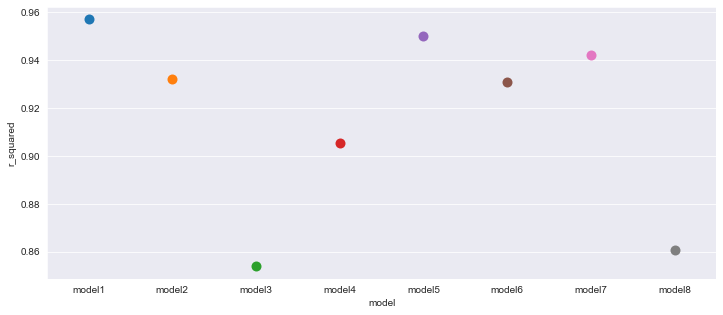

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,5))
sns.swarmplot(x='model', y='r_squared', data=rsqr_df, size=10)

Simple linear regression model gives best rsquared value without any transformations.

### Prediction and evaluation on Model1

<AxesSubplot:xlabel='Salary'>

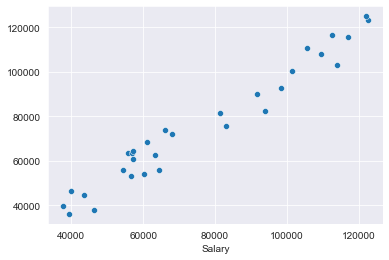

In [20]:
predicted = model1.predict(df.YearsExperience)

# Actual vs Predicted 
sns.scatterplot(y=predicted, x=df.Salary)

### Find outliers using cook's distance

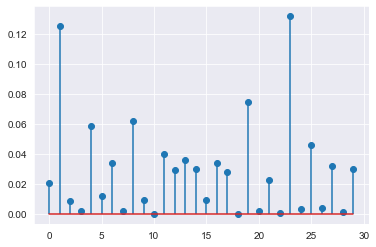

In [21]:
#calculate the cook distance
(c,_)= model1.get_influence().cooks_distance
plt.stem(range((df.shape[0])), c)
plt.show()

In [22]:
(np.argmax(c), np.max(c))

(23, 0.13175452313135222)

In [23]:
df.drop(df.index[23], axis=0, inplace=True)

In [24]:
model = smf.ols('Salary~YearsExperience', data=df).fit()
model.rsquared

0.9596859966454178

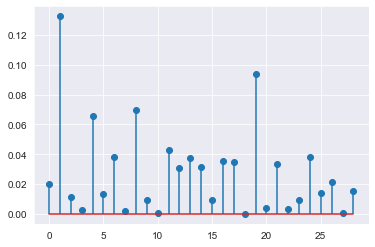

In [25]:
# again calculate the cook distance
(c,_)= model.get_influence().cooks_distance
plt.stem(range((df.shape[0])), c)
plt.show() 

In [26]:
(np.argmax(c), np.max(c))

(1, 0.13248738488345688)

In [27]:
df.drop(df.index[1], axis=0, inplace=True)

In [28]:
model = smf.ols('Salary~YearsExperience', data=df).fit()
model.rsquared

0.9615558970834558

In [29]:
model.params

Intercept          25049.700325
YearsExperience     9464.185396
dtype: float64

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     650.3
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           6.32e-20
Time:                        23:25:47   Log-Likelihood:                -279.15
No. Observations:                  28   AIC:                             562.3
Df Residuals:                      26   BIC:                             565.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.505e+04   2230.710     11.229      0.000    2.05e+04    2.96e+04
YearsExperience  9464.1854    371.128     25.501      0.000    8701.320    1.02e+04
==============================================================================
Omnibus:                        1.375   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                1.290
Skew:                           0.445   Prob(JB):                        0.525
Kurtosis:                       2.439   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Salary'>

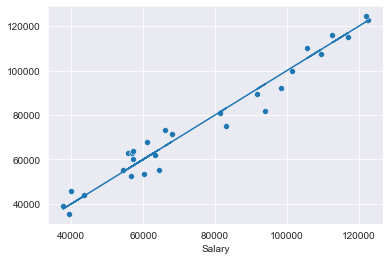

In [31]:
predicted = model.predict(df.YearsExperience)

# Actual vs Predicted 
plt.plot(df.Salary,df.Salary)
sns.scatterplot(y=predicted, x=df.Salary)

Note: removing outliers from small data set is inappropriate, here the goal is to get higher rsquared value

Thank you!